In [107]:
import numpy as np
from scipy import stats
import pandas as pd
import time
#import math
#importing packages
import seaborn as sns
import matplotlib.pyplot as plt

In [108]:

# Sklearn
import sklearn
# Preprocessor from sklearn
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Keras
import keras
# ANNs from keras
from keras.models import Sequential
from keras.utils.vis_utils import plot_model
from keras.layers import Dropout, Dense, LSTM

# Import cufflinks for visualization
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] =(20,10)
plt.style.use('fivethirtyeight')

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Feature selection
import seaborn as sns
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
# Feature importance
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt

# Models
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
#from skpp import ProjectionPursuitRegressor
#from skpp import ProjectionPursuitClassifier
# # ANNs
from tensorflow.keras import Input
from tensorflow.keras.layers import Dense, LSTM
from tensorflow.keras.models import load_model, Model

# Model Metrics
from sklearn.metrics import accuracy_score
# ROC Curve
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# Resample
# Block Bootstrap
#from arch.bootstrap import StationaryBootstrap
# Time Series cross-validation
#from sklearn.model_selection import TimeSeriesSplit

# Class encoder
#from sklearn.preprocessing import LabelEncoder 

seed_value = 4

## 1. Loading data 

In [109]:
df = pd.read_csv('..\\Extraction\\DATA_CURATED\\DF_CURATED_2022_11_30_17.csv')

In [110]:
df.index=df["Date"]

In [111]:
df.head(2)

,Date,Y_next_returns,Close,Volume,daily_returns,day-of-week,week-of-year,month-of-year,day_volatility_%,gold_returns,...,VIX_returns,US_returns,GDP,CPILFESL,PCE,UMCSENT,INDPRO,IPMAN,MACD_Signal,RSI
Date,,,,,,,,,,,,,,,,,,,,,
2002-10-01,2002-10-01,-1.897555,847.909973,1780900000,3.924282,1,40,10,0.043195,0.342202,...,8.776825,-0.308687,0.007046,0.001045,0.005912,-0.063879,-0.002603,-0.003215,-17.469623,35.392130
2002-10-02,2002-10-02,-1.088137,827.909973,1668900000,-1.897555,2,40,10,0.030768,-0.592731,...,-4.640371,0.102591,0.007046,0.001045,0.005912,-0.063879,-0.002603,-0.003215,-18.030956,35.824121


In [112]:
df.tail(2)

,Date,Y_next_returns,Close,Volume,daily_returns,day-of-week,week-of-year,month-of-year,day_volatility_%,gold_returns,...,VIX_returns,US_returns,GDP,CPILFESL,PCE,UMCSENT,INDPRO,IPMAN,MACD_Signal,RSI
Date,,,,,,,,,,,,,,,,,,,,,
2022-05-26,2022-05-26,1.962509,4057.840088,4709970000,1.821388,3,21,5,0.022722,-0.379631,...,3.290712,0.186407,0.020533,0.005692,0.0036,0.097643,0.006751,0.004581,-99.659048,45.972021
2022-05-27,2022-05-27,-0.457308,4158.240234,4375620000,1.962509,4,21,5,0.019880,-0.162180,...,6.691713,0.049170,0.020533,0.005692,0.0036,0.097643,0.006751,0.004581,-93.079233,60.686509


In [113]:
df = df.dropna()

In [114]:
df.index = df["Date"]

In [115]:
df.drop(["Date"],1,inplace=True)

In [116]:
df.shape

(4926, 24)

In [117]:
list(df.keys())

['Y_next_returns',
 'Close',
 'Volume',
 'daily_returns',
 'day-of-week',
 'week-of-year',
 'month-of-year',
 'day_volatility_%',
 'gold_returns',
 'oil_returns',
 'yield_returns',
 'yield_10_y_returns',
 'nasdaq_returns',
 'dowJones_returns',
 'VIX_returns',
 'US_returns',
 'GDP',
 'CPILFESL',
 'PCE',
 'UMCSENT',
 'INDPRO',
 'IPMAN',
 'MACD_Signal',
 'RSI']

In [118]:
X=df.copy()

In [119]:
# 70% train/test split
split = int(len(X) * 0.7)

In [120]:
X_train = X[:split]

## 2. Spliting the data in OneVSAll categories

#### The goal is to find the down_threshold and the up_threshold that splits the data set in 3 balanced categories

In [121]:
n = len(X_train["Y_next_returns"])

In [122]:
m=int(n/3)

In [123]:
m

1149

In [124]:
n

3448

In [125]:
down_threshold = min(X_train["Y_next_returns"])
up_threshold = max(X_train["Y_next_returns"])

In [126]:
down_threshold = -0.22864405318967185

In [127]:
up_threshold = 0.36543584740416746

In [128]:
#while ((X_train["Y_next_returns"]<=down_threshold).sum())<m:
#    down_threshold=down_threshold+0.0001    
#while ((X_train["Y_next_returns"]>=up_threshold).sum())<m:
#   up_threshold=up_threshold-0.0001

In [129]:
print("Threshold to consider a DOWN prediction: ", down_threshold)

Threshold to consider a DOWN prediction:  -0.22864405318967185


In [130]:
print("Threshold to consider an UP prediction: ", up_threshold)

Threshold to consider an UP prediction:  0.36543584740416746


In [131]:
n_up=(X_train["Y_next_returns"]>=up_threshold).sum()
n_up

1149

In [132]:
n_down=(X_train["Y_next_returns"]<=down_threshold).sum()
n_down

1149

In [133]:
n_lateral = len(X_train["Y_next_returns"])-(X_train["Y_next_returns"]<=down_threshold).sum()-(X_train["Y_next_returns"]>=up_threshold).sum()
n_lateral

1150

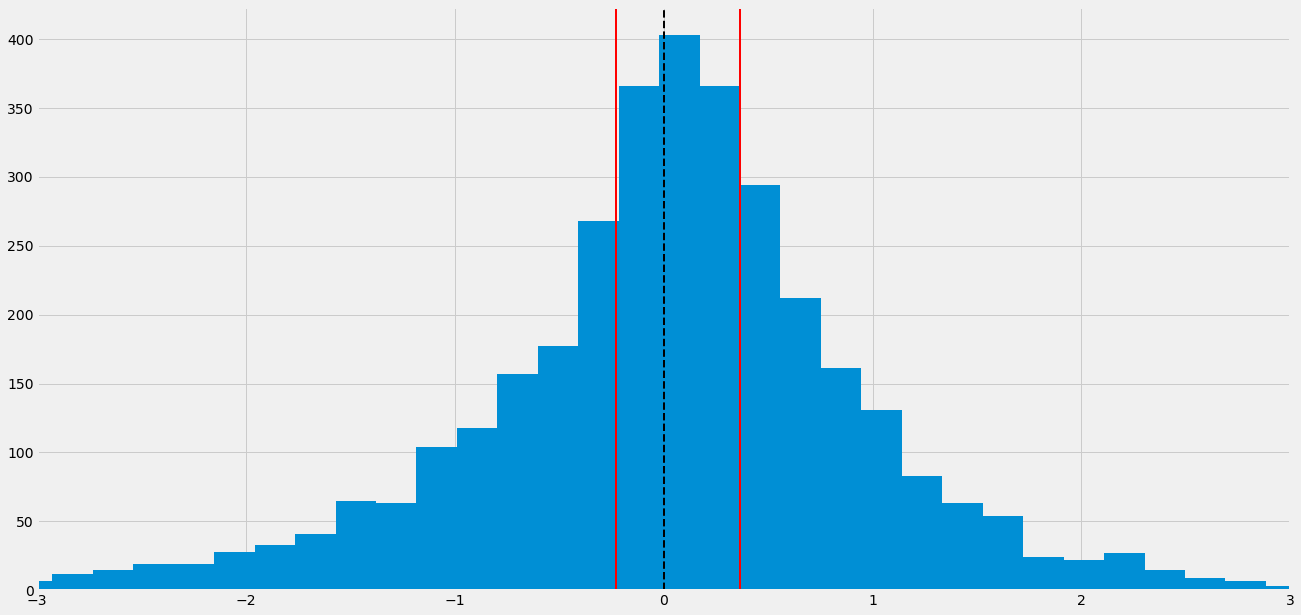

In [134]:
plt.hist(X_train["Y_next_returns"], bins=100)
plt.axvline(down_threshold, color='r', linestyle='solid', linewidth=2)
plt.axvline(up_threshold, color='r', linestyle='solid', linewidth=2)
plt.axvline(0, color='k', linestyle='--', linewidth=2)
plt.xlim([-3, 3])
plt.show()

##### It is interesting that close to the peak there are more positive values but at the tails there are more negative values

## 2.1. Down vs ALL

In [135]:
label_down=[]
for i in range(len(X["Y_next_returns"])):
    if X["Y_next_returns"][i]<=down_threshold:
        label_down.append(0)
    else:
        label_down.append(1)


In [136]:
label_lateral=[]
for i in range(len(X["Y_next_returns"])):
    if X["Y_next_returns"][i]<=down_threshold or X["Y_next_returns"][i]>=up_threshold:
        label_lateral.append(1)
    else:
        label_lateral.append(0)

In [137]:
label_up=[]
for i in range(len(X["Y_next_returns"])):
    if X["Y_next_returns"][i]>=up_threshold:
        label_up.append(0)
    else:
        label_up.append(1)

In [138]:
Y_next_returns = X["Y_next_returns"]

In [139]:
X.drop("Y_next_returns",1,inplace=True)

# Classifing and Splitting the Data Set

In [140]:
# 70% train/test split
split = int(len(X) * 0.7)
# We transform Y to a binary classification problem's values (0 y 1)
from sklearn.preprocessing import LabelEncoder 

# Classifing Down vs ALL

In [141]:
Y=label_down

encoder = LabelEncoder() 
encoder.fit(Y) 
encoded_Y = encoder.transform(Y) 

# We transform encoded_Y into a dataframe in order to use .iloc and being able to make the train/test split
Y = pd.DataFrame(encoded_Y, columns = ['Real'],index=X.index) 

# We have to twist the dataset
X_train, y_train = X[:split], Y[:split]

# Test data after train split
X_test, y_test = X[split:], Y[split:]
# Scale the features MinMax for training and test datasets
scaler = MinMaxScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

# We change from array to dataframe
X_train=pd.DataFrame(scaled_X_train,columns=X.columns,index=X.iloc[:split].index)
y_train=pd.DataFrame(y_train,columns=Y.columns,index=Y[:split].index)
X_test=pd.DataFrame(scaled_X_test,columns=X.columns,index=X[split:].index)
y_test=pd.DataFrame(y_test,columns=Y.columns,index=Y[split:].index)


lr=LogisticRegression(solver='lbfgs',max_iter=10000)
start_lr = time.time()
lr.fit(X_train, y_train)
end_lr = time.time()
lr_runtime=end_lr - start_lr

print('Runtime:',lr_runtime)
print("score on test: %.3f" % lr.score(X_test, y_test))
print("score on train: %.3f" % lr.score(X_train, y_train))

y_test_predicted_down=lr.predict(X_test)

Runtime: 0.02991962432861328
score on test: 0.718
score on train: 0.672


In [144]:
X_test.head(1)

,Close,Volume,daily_returns,day-of-week,week-of-year,month-of-year,day_volatility_%,gold_returns,oil_returns,yield_returns,...,VIX_returns,US_returns,GDP,CPILFESL,PCE,UMCSENT,INDPRO,IPMAN,MACD_Signal,RSI
Date,,,,,,,,,,,,,,,,,,,,,
2016-07-08,0.999367,0.286344,0.527005,1.0,0.5,0.545455,0.085955,0.539573,0.50855,0.398186,...,0.740442,0.454023,0.674922,0.351306,0.480298,0.452116,0.749384,0.686092,0.720939,0.552755


In [145]:
X_test.tail(1)

,Close,Volume,daily_returns,day-of-week,week-of-year,month-of-year,day_volatility_%,gold_returns,oil_returns,yield_returns,...,VIX_returns,US_returns,GDP,CPILFESL,PCE,UMCSENT,INDPRO,IPMAN,MACD_Signal,RSI
Date,,,,,,,,,,,,,,,,,,,,,
2022-05-27,2.394096,0.356186,0.572434,1.0,0.384615,0.363636,0.15785,0.510127,0.498376,0.399913,...,0.687902,0.466582,0.954459,1.604045,0.582208,0.87852,0.87837,0.758494,-0.220952,0.570761


In [143]:
X_train.tail(1)

,Close,Volume,daily_returns,day-of-week,week-of-year,month-of-year,day_volatility_%,gold_returns,oil_returns,yield_returns,...,VIX_returns,US_returns,GDP,CPILFESL,PCE,UMCSENT,INDPRO,IPMAN,MACD_Signal,RSI
Date,,,,,,,,,,,,,,,,,,,,,
2016-07-07,0.977363,0.286076,0.464936,0.75,0.5,0.545455,0.065477,0.548008,0.746023,0.392348,...,0.595785,0.41458,0.674922,0.351306,0.480298,0.452116,0.749384,0.686092,0.707552,0.489053


# Classifing Lateral vs ALL

In [95]:
Y=label_down

encoder = LabelEncoder() 
encoder.fit(Y) 
encoded_Y = encoder.transform(Y) 

# We transform encoded_Y into a dataframe in order to use .iloc and being able to make the train/test split
Y = pd.DataFrame(encoded_Y, columns = ['Real'],index=X.index) 

# We have to twist the dataset
X_train, y_train = X[:split], Y[:split]

# Test data after train split
X_test, y_test = X[split:], Y[split:]
# Scale the features MinMax for training and test datasets
scaler = MinMaxScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

# We change from array to dataframe
X_train=pd.DataFrame(scaled_X_train,columns=X.columns,index=X.iloc[:split].index)
y_train=pd.DataFrame(y_train,columns=Y.columns,index=Y[:split].index)
X_test=pd.DataFrame(scaled_X_test,columns=X.columns,index=X[split:].index)
y_test=pd.DataFrame(y_test,columns=Y.columns,index=Y[split:].index)


lr=LogisticRegression(solver='lbfgs',max_iter=10000)
start_lr = time.time()
lr.fit(X_train, y_train)
end_lr = time.time()
lr_runtime=end_lr - start_lr

print('Runtime:',lr_runtime)
print("score on test: %.3f" % lr.score(X_test, y_test))
print("score on train: %.3f" % lr.score(X_train, y_train))

y_test_predicted_lateral=lr.predict(X_test)

Runtime: 0.02890753746032715
score on test: 0.718
score on train: 0.672


# Classifing Up vs ALL

In [96]:
Y=label_up

encoder = LabelEncoder() 
encoder.fit(Y) 
encoded_Y = encoder.transform(Y) 

# We transform encoded_Y into a dataframe in order to use .iloc and being able to make the train/test split
Y = pd.DataFrame(encoded_Y, columns = ['Real'],index=X.index) 

# We have to twist the dataset
X_train, y_train = X[:split], Y[:split]

# Test data after train split
X_test, y_test = X[split:], Y[split:]
# Scale the features MinMax for training and test datasets
scaler = MinMaxScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

# We change from array to dataframe
X_train=pd.DataFrame(scaled_X_train,columns=X.columns,index=X.iloc[:split].index)
y_train=pd.DataFrame(y_train,columns=Y.columns,index=Y[:split].index)
X_test=pd.DataFrame(scaled_X_test,columns=X.columns,index=X[split:].index)
y_test=pd.DataFrame(y_test,columns=Y.columns,index=Y[split:].index)


lr=LogisticRegression(solver='lbfgs',max_iter=10000)
start_lr = time.time()
lr.fit(X_train, y_train)
end_lr = time.time()
lr_runtime=end_lr - start_lr

print('Runtime:',lr_runtime)
print("score on test: %.3f" % lr.score(X_test, y_test))
print("score on train: %.3f" % lr.score(X_train, y_train))

y_test_predicted_up=lr.predict(X_test)

Runtime: 0.02788710594177246
score on test: 0.723
score on train: 0.667


In [99]:
y_test["returns"] = Y_next_returns

In [100]:
y_test["Predicted_DownVSAll"] = y_test_predicted_down
y_test["Predicted_LateralVSAll"] = y_test_predicted_lateral
y_test["Predicted_UpVSAll"] = y_test_predicted_up

In [105]:
y_test.Predicted_DownVSAll==0

Date
2016-07-08    False
2016-07-11    False
2016-07-12    False
2016-07-13    False
2016-07-14    False
              ...  
2022-05-23    False
2022-05-24    False
2022-05-25    False
2022-05-26    False
2022-05-27    False
Name: Predicted_DownVSAll, Length: 1478, dtype: bool

In [106]:
y_test.Predicted_UpVSAll==0

Date
2016-07-08    False
2016-07-11    False
2016-07-12    False
2016-07-13    False
2016-07-14    False
              ...  
2022-05-23    False
2022-05-24    False
2022-05-25    False
2022-05-26    False
2022-05-27    False
Name: Predicted_UpVSAll, Length: 1478, dtype: bool

In [101]:
y_test[y_test["Predicted_DownVSAll"]==0]

,Real,returns,Predicted_DownVSAll,Predicted_LateralVSAll,Predicted_UpVSAll
Date,,,,,
2020-04-01,0,2.742552,0,0,1
2020-04-02,1,-1.050061,0,0,1
2020-04-03,0,3.258608,0,0,1
2020-04-06,1,-2.936080,0,0,1
2020-04-07,0,2.391290,0,0,1
2020-04-08,0,0.460950,0,0,1
2020-04-09,1,-0.751437,0,0,1
2020-04-13,0,1.449638,0,0,1
2020-04-14,1,-0.440215,0,0,1


In [102]:
y_test[y_test["Predicted_UpVSAll"]==0]

,Real,returns,Predicted_DownVSAll,Predicted_LateralVSAll,Predicted_UpVSAll
Date,,,,,
2018-02-08,0,0.680673,1,1,0
2018-12-21,1,-2.081872,1,1,0
2018-12-24,0,4.330369,1,1,0
2020-03-03,0,2.732420,1,1,0
2020-03-09,0,2.414215,1,1,0
2020-03-11,1,-5.879428,1,1,0
2020-03-12,0,5.342295,1,1,0
2020-03-16,0,4.179545,1,1,0
2020-03-17,1,-1.588579,1,1,0


In [90]:
y_test.tail(5)

,Real,Predicted
Date,,
2022-05-23,1,1
2022-05-24,1,1
2022-05-25,1,1
2022-05-26,1,1
2022-05-27,0,1


In [91]:
from sklearn.metrics import confusion_matrix

In [92]:
cm = confusion_matrix(y_test["Real"],y_test["Predicted"])

In [93]:
cm

array([[  17,  397],
       [  20, 1044]], dtype=int64)

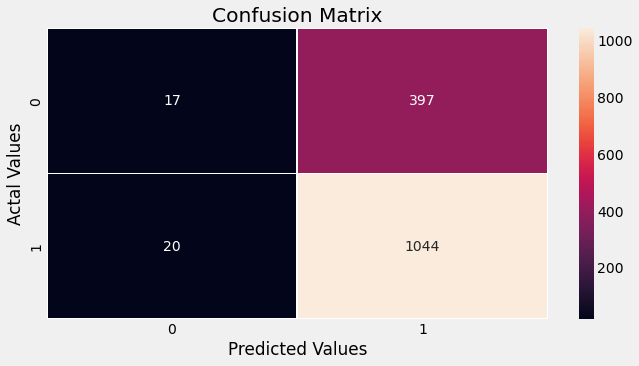

In [94]:
#Plotting the confusion matrix
plt.figure(figsize=(10,5))
sns.heatmap(cm, linewidths=1, annot=True, fmt='g')
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

In [125]:
print("y_test en Real casos Downs: ",(y_test["Real"]==0).sum())
print("y_test en Real casos Lateral: ",(y_test["Real"]==1).sum())
print("y_test en Real casos UP: ",(y_test["Real"]==2).sum())

y_test en Real casos Downs:  414
y_test en Real casos Lateral:  650
y_test en Real casos UP:  414


In [50]:
print("Casos Downs, Accuracy considering all cases Down: ",(y_test["Real"]==0).sum()/len(y_test["Real"]))
print("Casos Lateral, Accuracy considering all cases Lateral: ",(y_test["Real"]==1).sum()/len(y_test["Real"]))
print("Casos UP, Accuracy considering all cases UP: ",(y_test["Real"]==2).sum()/len(y_test["Real"]))

Casos Downs, Accuracy considering all cases Down:  0.3366890380313199
Casos Lateral, Accuracy considering all cases Lateral:  0.3366890380313199
Casos UP, Accuracy considering all cases UP:  0.3366890380313199


In [49]:
print("y_test en Predicted casos Downs: ",(y_test["Predicted"]==0).sum())
print("y_test en Predicted casos Lateral: ",(y_test["Predicted"]==1).sum())
print("y_test en Predicted casos UP: ",(y_test["Predicted"]==2).sum())

y_test en Predicted casos Downs:  51
y_test en Predicted casos Lateral:  775
y_test en Predicted casos UP:  68


In [52]:
print("Casos Downs, Accuracy considering all cases Down: ",(y_test["Predicted"]==0).sum()/len(y_test["Predicted"]))
print("Casos Lateral, Accuracy considering all cases Lateral: ",(y_test["Predicted"]==1).sum()/len(y_test["Predicted"]))
print("Casos UP, Accuracy considering all cases UP: ",(y_test["Predicted"]==2).sum()/len(y_test["Predicted"]))

Casos Downs, Accuracy considering all cases Down:  0.05704697986577181
Casos Lateral, Accuracy considering all cases Lateral:  0.8668903803131991
Casos UP, Accuracy considering all cases UP:  0.07606263982102908


In [53]:
y_test

,Real,Predicted
Date,,
2018-06-11,1,1
2018-06-12,0,1
2018-06-13,1,1
2018-06-14,1,1
2018-06-15,2,1
...,...,...
2021-12-23,2,1
2021-12-27,0,1
2021-12-28,1,1


## Adding the returns

In [54]:
y_test["returns"]=df["Y_next_returns"][split:]

In [55]:
y_test.shape

(894, 3)

## Values were actions are taken

In [56]:
y_test = y_test[y_test["Predicted"]!=1]

In [57]:
y_test.shape

(119, 3)

In [58]:
y_test.head(10)

,Real,Predicted,returns
Date,,,
2018-06-25,1,2,0.034524
2018-06-27,2,2,0.650791
2018-10-10,0,2,-1.762003
2018-10-11,1,2,-0.123162
2018-10-12,0,0,-0.472927
2018-10-15,2,2,1.537420
2018-10-17,0,0,-1.192665
2018-10-18,0,2,-0.284296
2018-10-19,0,0,-0.653190


## popi


In [59]:
y_test["action"]=y_test["Real"]==y_test["Predicted"]

In [61]:
y_test.head(10)

,Real,Predicted,returns,action
Date,,,,
2018-06-25,1,2,0.034524,False
2018-06-27,2,2,0.650791,True
2018-10-10,0,2,-1.762003,False
2018-10-11,1,2,-0.123162,False
2018-10-12,0,0,-0.472927,True
2018-10-15,2,2,1.537420,True
2018-10-17,0,0,-1.192665,True
2018-10-18,0,2,-0.284296,False
2018-10-19,0,0,-0.653190,True


In [62]:
y_test["position"] = np.where(y_test["Predicted"]<1, -1, 1 )

In [63]:
y_test

,Real,Predicted,returns,action,position
Date,,,,,
2018-06-25,1,2,0.034524,False,1
2018-06-27,2,2,0.650791,True,1
2018-10-10,0,2,-1.762003,False,1
2018-10-11,1,2,-0.123162,False,1
2018-10-12,0,0,-0.472927,True,-1
...,...,...,...,...,...
2020-09-21,2,0,0.599582,False,-1
2020-09-23,2,2,0.631890,True,1
2020-10-28,2,2,1.000123,True,1


In [64]:
y_test["strategy"] = y_test.position * y_test["returns"]

In [81]:
y_test

,Real,Predicted,returns,action,position,strategy,cstrategy,strategy_returns
Date,,,,,,,,
2018-06-25,1,2,0.034524,False,1,0.034524,NaN,1.000345
2018-06-27,2,2,0.650791,True,1,0.650791,0.022468,1.006508
2018-10-10,0,2,-1.762003,False,1,-1.762003,-1.146697,0.982380
2018-10-11,1,2,-0.123162,False,1,-0.123162,0.217012,0.998768
2018-10-12,0,0,-0.472927,True,-1,0.472927,-0.058247,1.004729
...,...,...,...,...,...,...,...,...
2020-09-21,2,0,0.599582,False,-1,-0.599582,-0.684330,0.994004
2020-09-23,2,2,0.631890,True,1,0.631890,-0.378870,1.006319
2020-10-28,2,2,1.000123,True,1,1.000123,0.631968,1.010001


In [82]:
y_test["strategy_returns"] = (100+y_test["strategy"])/100

In [83]:
y_test.head(10)

,Real,Predicted,returns,action,position,strategy,cstrategy,strategy_returns
Date,,,,,,,,
2018-06-25,1,2,0.034524,False,1,0.034524,NaN,1.000345
2018-06-27,2,2,0.650791,True,1,0.650791,0.022468,1.006508
2018-10-10,0,2,-1.762003,False,1,-1.762003,-1.146697,0.982380
2018-10-11,1,2,-0.123162,False,1,-0.123162,0.217012,0.998768
2018-10-12,0,0,-0.472927,True,-1,0.472927,-0.058247,1.004729
2018-10-15,2,2,1.537420,True,1,1.537420,0.727087,1.015374
2018-10-17,0,0,-1.192665,True,-1,1.192665,1.833626,1.011927
2018-10-18,0,2,-0.284296,False,1,-0.284296,-0.339070,0.997157
2018-10-19,0,0,-0.653190,True,-1,0.653190,-0.185699,1.006532


In [87]:
returns=[]
returns.append(1)
j=0
for i in y_test["strategy_returns"]:
    returns.append(returns[j]*i)
    j=j+1

In [89]:
returns

[1,
 1.000345237948146,
 1.0068553995476657,
 0.989114575099376,
 0.9878963603179949,
 0.9925683888040077,
 1.007828330735929,
 1.0198483438426964,
 1.0169489561218357,
 1.0235915678591754,
 1.0309606044567827,
 1.0622207427654433,
 1.074338727522571,
 1.078037885187998,
 1.094804377279919,
 1.112059785103909,
 1.1095390164485133,
 1.100273052640748,
 1.109282868136846,
 1.1044354505025065,
 1.1112906574402406,
 1.0954762277022254,
 1.0953005071191166,
 1.1143029183467612,
 1.1110859958500852,
 1.1259238288540894,
 1.1106946359991183,
 1.1053638664789496,
 1.108616880672532,
 1.1089537439804,
 1.1013116833198273,
 1.0801002805902515,
 1.0797727535455004,
 1.0709702599466338,
 1.0839352366512764,
 1.107624853426025,
 1.1105091825023385,
 1.122097784861976,
 1.119071349620351,
 1.0995463537945367,
 1.093628760512111,
 1.1109791783602634,
 1.097841998794973,
 1.0759115200521143,
 1.0535124165778647,
 1.0991333954095117,
 1.0784799677858257,
 1.0728414365927195,
 1.069450822766618,
 1.0836

In [92]:
y_test["strategy_returns_accum"]=returns[1:len(returns)+1]

In [93]:
y_test

,Real,Predicted,returns,action,position,strategy,cstrategy,strategy_returns,strategy_returns_accum
Date,,,,,,,,,
2018-06-25,1,2,0.034524,False,1,0.034524,NaN,1.000345,1.000345
2018-06-27,2,2,0.650791,True,1,0.650791,0.022468,1.006508,1.006855
2018-10-10,0,2,-1.762003,False,1,-1.762003,-1.146697,0.982380,0.989115
2018-10-11,1,2,-0.123162,False,1,-0.123162,0.217012,0.998768,0.987896
2018-10-12,0,0,-0.472927,True,-1,0.472927,-0.058247,1.004729,0.992568
...,...,...,...,...,...,...,...,...,...
2020-09-21,2,0,0.599582,False,-1,-0.599582,-0.684330,0.994004,1.633201
2020-09-23,2,2,0.631890,True,1,0.631890,-0.378870,1.006319,1.643521
2020-10-28,2,2,1.000123,True,1,1.000123,0.631968,1.010001,1.659958


In [94]:
X["Close"]

Date
2010-02-22    1108.010010
2010-02-23    1094.599976
2010-02-24    1105.239990
2010-02-25    1102.939941
2010-02-26    1104.489990
                 ...     
2021-12-23    4725.790039
2021-12-27    4791.189941
2021-12-28    4786.350098
2021-12-29    4793.060059
2021-12-30    4778.729980
Name: Close, Length: 2980, dtype: float64

In [120]:
df_1=df["Close"][split:]

In [121]:
df_1=pd.DataFrame(df_1)

In [122]:
df_1

,Close
Date,
2018-06-11,2782.000000
2018-06-12,2786.850098
2018-06-13,2775.629883
2018-06-14,2782.489990
2018-06-15,2779.659912
...,...
2021-12-23,4725.790039
2021-12-27,4791.189941
2021-12-28,4786.350098


In [128]:
df_1["returns_hold"] = np.log(df_1.Close.div(df_1.Close.shift(1)))

In [129]:
df_1

,Close,returns,creturns,returns_hold
Date,,,,
2018-06-11,2782.000000,NaN,NaN,NaN
2018-06-12,2786.850098,0.001742,1.001743,0.001742
2018-06-13,2775.629883,-0.004034,0.997710,-0.004034
2018-06-14,2782.489990,0.002469,1.000176,0.002469
2018-06-15,2779.659912,-0.001018,0.999159,-0.001018
...,...,...,...,...
2021-12-23,4725.790039,0.006204,1.698702,0.006204
2021-12-27,4791.189941,0.013744,1.722211,0.013744
2021-12-28,4786.350098,-0.001011,1.720471,-0.001011


In [130]:
df_1["creturns_hold"] = df_1["returns_hold"].cumsum().apply(np.exp)

In [131]:
df_1

,Close,returns,creturns,returns_hold,creturns_hold
Date,,,,,
2018-06-11,2782.000000,NaN,NaN,NaN,NaN
2018-06-12,2786.850098,0.001742,1.001743,0.001742,1.001743
2018-06-13,2775.629883,-0.004034,0.997710,-0.004034,0.997710
2018-06-14,2782.489990,0.002469,1.000176,0.002469,1.000176
2018-06-15,2779.659912,-0.001018,0.999159,-0.001018,0.999159
...,...,...,...,...,...
2021-12-23,4725.790039,0.006204,1.698702,0.006204,1.698702
2021-12-27,4791.189941,0.013744,1.722211,0.013744,1.722211
2021-12-28,4786.350098,-0.001011,1.720471,-0.001011,1.720471


In [132]:
y_test

,Real,Predicted,returns,action,position,strategy,cstrategy,strategy_returns,strategy_returns_accum
Date,,,,,,,,,
2018-06-25,1,2,0.034524,False,1,0.034524,NaN,1.000345,1.000345
2018-06-27,2,2,0.650791,True,1,0.650791,0.022468,1.006508,1.006855
2018-10-10,0,2,-1.762003,False,1,-1.762003,-1.146697,0.982380,0.989115
2018-10-11,1,2,-0.123162,False,1,-0.123162,0.217012,0.998768,0.987896
2018-10-12,0,0,-0.472927,True,-1,0.472927,-0.058247,1.004729,0.992568
...,...,...,...,...,...,...,...,...,...
2020-09-21,2,0,0.599582,False,-1,-0.599582,-0.684330,0.994004,1.633201
2020-09-23,2,2,0.631890,True,1,0.631890,-0.378870,1.006319,1.643521
2020-10-28,2,2,1.000123,True,1,1.000123,0.631968,1.010001,1.659958


In [133]:
df_1["returns_strategy"]=y_test["strategy_returns_accum"]

In [136]:
df_1.returns_strategy.fillna(method = "ffill", inplace= True)

In [137]:
df_1

,Close,returns,creturns,returns_hold,creturns_hold,returns_strategy
Date,,,,,,
2018-06-11,2782.000000,NaN,NaN,NaN,NaN,NaN
2018-06-12,2786.850098,0.001742,1.001743,0.001742,1.001743,NaN
2018-06-13,2775.629883,-0.004034,0.997710,-0.004034,0.997710,NaN
2018-06-14,2782.489990,0.002469,1.000176,0.002469,1.000176,NaN
2018-06-15,2779.659912,-0.001018,0.999159,-0.001018,0.999159,NaN
...,...,...,...,...,...,...
2021-12-23,4725.790039,0.006204,1.698702,0.006204,1.698702,1.674951
2021-12-27,4791.189941,0.013744,1.722211,0.013744,1.722211,1.674951
2021-12-28,4786.350098,-0.001011,1.720471,-0.001011,1.720471,1.674951


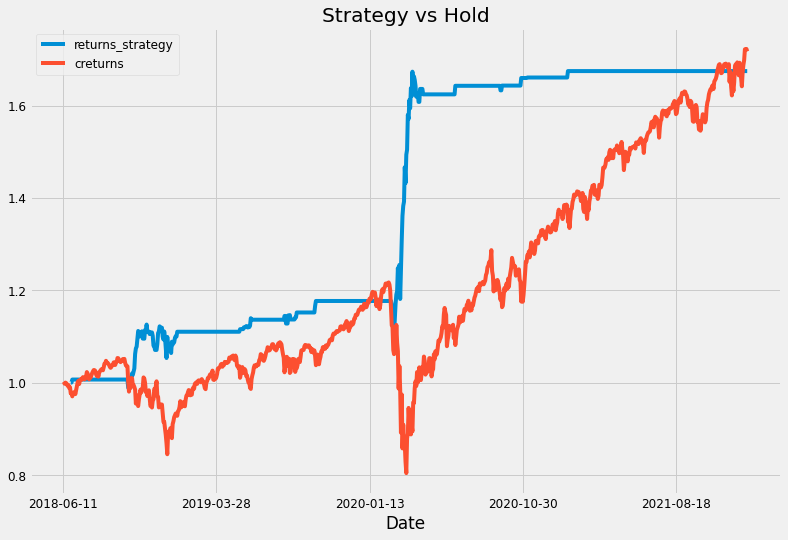

In [149]:
df_1[["returns_strategy", "creturns"]].plot(figsize = (12, 8), title = "Strategy vs Hold", fontsize = 12)
plt.legend(fontsize = 12)
plt.show()

In [150]:
df_1["cummax_hold"] = df_1.creturns.cummax()
df_1["cummax_strategy"] = df_1.returns_strategy.cummax()

In [155]:
df_1["drawndown_hold"] =     df_1["cummax_hold"] - df_1["creturns"]
df_1["drawndown_strategy"] = df_1["cummax_strategy"] - df_1["returns_strategy"]

In [159]:
df_1

,Close,returns,creturns,returns_hold,creturns_hold,returns_strategy,cummax_hold,cummax_strategy,drawndown_hold,drawndown_strategy
Date,,,,,,,,,,
2018-06-11,2782.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-06-12,2786.850098,0.001742,1.001743,0.001742,1.001743,NaN,1.001743,NaN,0.000000,NaN
2018-06-13,2775.629883,-0.004034,0.997710,-0.004034,0.997710,NaN,1.001743,NaN,0.004033,NaN
2018-06-14,2782.489990,0.002469,1.000176,0.002469,1.000176,NaN,1.001743,NaN,0.001567,NaN
2018-06-15,2779.659912,-0.001018,0.999159,-0.001018,0.999159,NaN,1.001743,NaN,0.002585,NaN
...,...,...,...,...,...,...,...,...,...,...
2021-12-23,4725.790039,0.006204,1.698702,0.006204,1.698702,1.674951,1.698702,1.674951,0.000000,0.0
2021-12-27,4791.189941,0.013744,1.722211,0.013744,1.722211,1.674951,1.722211,1.674951,0.000000,0.0
2021-12-28,4786.350098,-0.001011,1.720471,-0.001011,1.720471,1.674951,1.722211,1.674951,0.001740,0.0


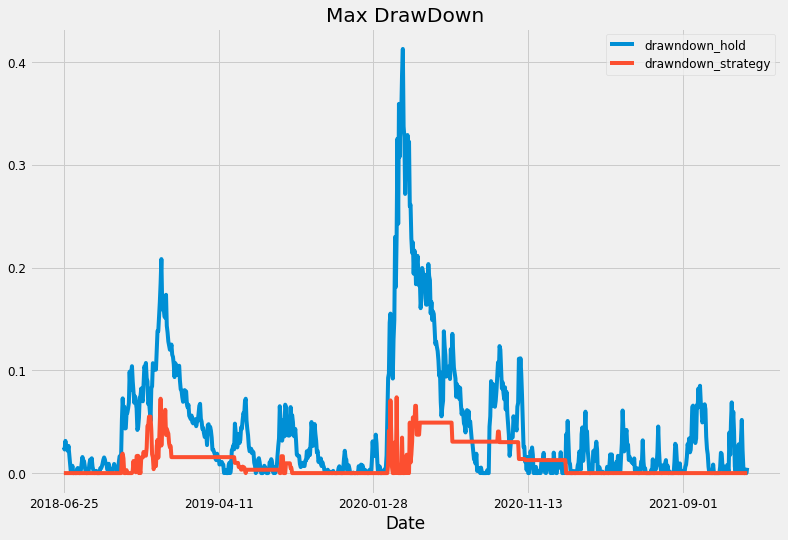

In [160]:
df_1[["drawndown_hold", "drawndown_strategy"]].dropna().plot(figsize = (12, 8), title = "Max DrawDown", fontsize = 12)
plt.legend(fontsize = 12)
plt.show()

In [168]:
Y.shape

(2980, 1)

In [167]:
X.shape

(2980, 17)

In [163]:
Y

,Column_A
Date,
2010-02-22,0
2010-02-23,2
2010-02-24,1
2010-02-25,1
2010-02-26,2
...,...
2021-12-23,2
2021-12-27,0
2021-12-28,1


In [169]:
lr=LogisticRegression(multi_class='multinomial', solver='lbfgs',max_iter=1000)

start_lr = time.time()
lr.fit(X_train, y_train)
end_lr = time.time()
lr_runtime=end_lr - start_lr

print('Runtime:',lr_runtime)
#print("score on test: %.3f" % lr.score(X_test, y_test))
print("score on train: %.3f" % lr.score(X_train, y_train))
print("score on total: %.3f" % lr.score(X, Y))

Runtime: 0.05883979797363281
score on train: 0.429
score on total: 0.340
